# Testing Block RK on AC system

## Generate random graph to define AC system

In [1]:
import matplotlib.pyplot as plt
from networkx import nx
import numpy as np
import scipy as sp
import kaczmarz

In [116]:
n = 50  # 50 nodes
m = 100  # 100 edges

G = nx.gnm_random_graph(n, m)

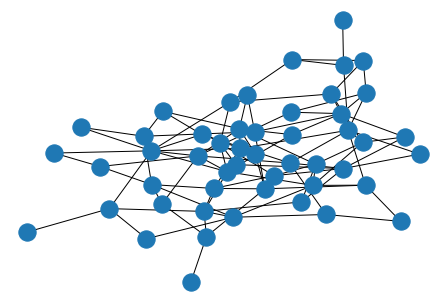

In [117]:
nx.draw(G)
plt.show()

## Generate incidence matrix and secret vector for AC system

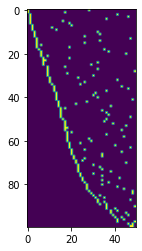

In [126]:
A = nx.linalg.graphmatrix.incidence_matrix(G)
A = sp.sparse.csr_matrix.todense(A).transpose()
plt.imshow(A)  # their incidence matrix is binary, we need to convert one of the ones to a -1

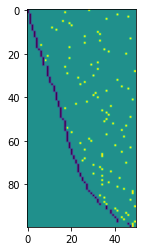

In [127]:
for i in range(np.shape(A)[0]):
    negindex = np.where(A[i,:] == 1)
    A[i,negindex[1][0]] = -1
plt.imshow(A)

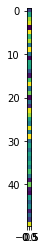

In [128]:
x = np.random.rand(n,1)
plt.imshow(x)
b = np.zeros((m,1))

In [129]:
xbar = np.mean(x)
xbar

0.5070894060693396

## Test RK on Incidence AC system

In [142]:
iterates = kaczmarz.Cyclic.iterates(A,b, x0 = x, tol = 1/n)
iteratematrix = x
norms = []

In [143]:
for xk in iterates:
    iteratematrix = np.append(iteratematrix,xk,axis=1)
    norms = np.append(norms,np.linalg.norm(xbar*np.ones([n,1])-xk)**2)

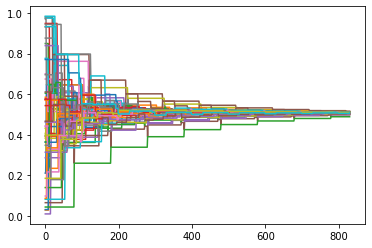

In [144]:
for i in range(n):
    plt.plot(range(np.shape(iteratematrix)[1]),iteratematrix[i,:])

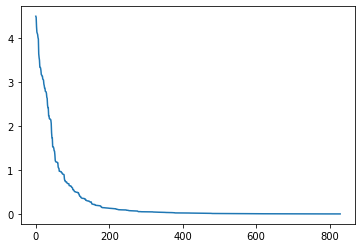

In [145]:
plt.plot(range(np.shape(norms)[0]),norms)